<a href="https://colab.research.google.com/github/AyozeGS/IABD/blob/main/7RO/T11_1/7RO_Python_To_TensorFlow_Farenheit_To_Celsius.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ayoze Gil Sosa

# CONVERSION DE GRADOS FAHRENHEIT A CELSIUS



Este cuaderno consiste en la conversión de la temperatura entre distintas unidades de medida usando redes neuronales con la finalidad de entrenar un modelo de regresión para ser probado en una aplicación web externa.

## Importación de librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

# Dataset

## Definición del Dataset

Los datos de entrada y salida generados automáticamente con la resultante de despejar la x en la función de conversión de celsius a fahrenheit $ (y * 9 / 5) + 32 = x $,

siendo 'x' la temperautura en grados Fahrenheit e 'y' en Celsius.

$ y = (x-32)*5/9 $

In [ ]:
_ = np.linspace(-459, 500, 10000, endpoint=True)

X = []
y = []

for i in range(1000):
  # Add value to Celsius
  f_value = np.random.choice(_)
  X.append(f_value)
  # Add value to Farenheit
  c_value = (f_value - 32) * 5 / 9
  y.append(c_value)

X = np.array(X)
y = np.array(y)

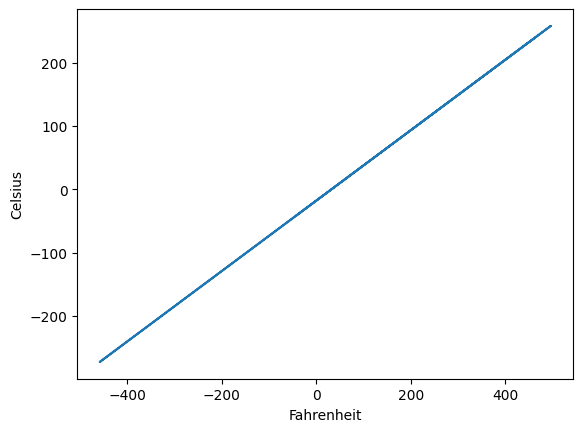

In [ ]:
plt.plot(X,y)
plt.xlabel('Fahrenheit')
plt.ylabel('Celsius');

## Separación del dataset en train, test y validation





In [ ]:
# Se separan datos de train y test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)
#Xtrain, Xvalidation, ytrain, yvalidation = train_test_split(Xtrain, ytrain, test_size=0.05, random_state=42)

print(f"Train: {100*len(Xtrain)/len(X)}%")
print(f"Test: {100*len(Xtest)/len(X)}%")
#print(f"Validation: {100*Xvalidation.count()/X.count()}%")

Train: 80.0%
Test: 20.0%


#  Modelo

## Definición del modelo de red neuronal
- La primera capa tiene 1 neurona
- Dos capas ocultas de 3 neuronas
- La capa de salida 1 (sin función de activación al ser un problema de regresión lineal)

In [ ]:
model = Sequential()
# Capa oculta con 64 neuronas y función de activación
model.add(Input(shape=[1]))
model.add(Dense(3))
model.add(Dense(3))
# Capa de salida con una neurona
model.add(Dense(1))
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 3)                 6         
                                                                 
 dense_121 (Dense)           (None, 3)                 12        
                                                                 
 dense_122 (Dense)           (None, 1)                 4         
                                                                 
Total params: 22 (88.00 Byte)
Trainable params: 22 (88.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Optimizador Adam y función de pérdida de error
optimizer = Adam()
model.compile(optimizer=optimizer, loss='mse')

## Entrenamiento
- El modelo se entrena durante 300 épocas.
- Se usa un tamaño de batch por defecto de 32 para estimar el gradiente.
- Ponemos verbose=0 si no queremos ver cómo se va reduciendo el valor de la función de coste ( error cuadrático medio).
- Se usa el 5% del dataset de entrenamiento para validación.

In [ ]:
# Función para definir la tasa de aprendizaje variable
def lr_schedule(epoch):
  """ Devuelve la tasa de aprendizaje para la época actual."""
  learning_rate = 0.001  # Tasa de aprendizaje inicial
  if epoch > 100:
      learning_rate *= 0.5  # Reducir a la mitad después de 50 épocas
  if epoch > 200:
      learning_rate *= 0.5  # Reducir a la mitad nuevamente después de 100 épocas
  return learning_rate

In [ ]:
# Entrenar Configurando el callback de la tasa de aprendizaje
history=model.fit(Xtrain, ytrain, epochs=300, verbose=0,callbacks=[LearningRateScheduler(lr_schedule)], validation_split = 0.05)

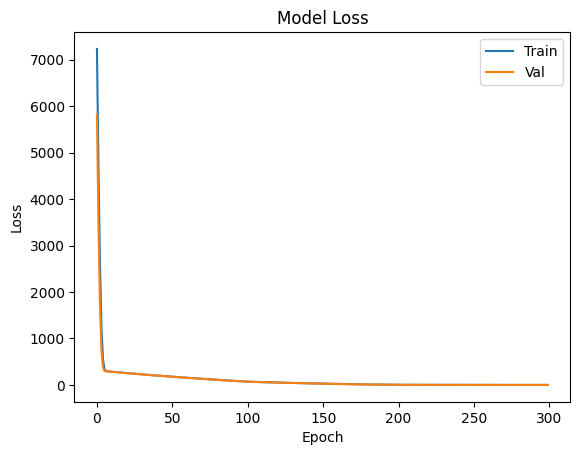

In [ ]:
def plot_loss(history, title="Model Loss"):
  """Imprime una gráfica mostrando la pérdida por epoch obtenida en un entrenamiento"""
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title(title)
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper right')
  plt.show()

plot_loss(history, title="Model Loss")

## Evaluacion

In [ ]:
model.evaluate(Xtest, ytest, verbose=1)

7/7 [==============================] - 0s 5ms/step - loss: 0.0031


0.0031302464194595814

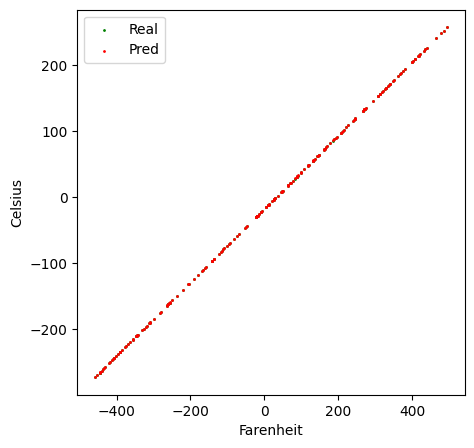

In [ ]:
ypred = model.predict(Xtest, verbose=0)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))

ax.scatter(Xtest, ytest, color='green', label='Real', s=1)
ax.scatter(Xtest, ypred, color='red', label='Pred', s=1)
ax.set_ylabel('Celsius')
ax.set_xlabel('Farenheit')
ax.legend();

#  Curiosidad: Modelo con activación RELU

Podemos observar que si entrenamos el modelo usando activadores RELU, la salida para cierto rango de valores de entrada será siempre 0.

## Definición del modelo de red neuronal
- La primera capa tiene 1 neurona
- Dos capas ocultas de 3 neuronas
- La capa de salida 1 (sin función de activación al ser un problema de regresión lineal)

In [ ]:
model = Sequential()
# Capa oculta con 64 neuronas y función de activación
model.add(Input(shape=[1]))
model.add(Dense(3, activation='relu'))
model.add(Dense(3, activation='relu'))
# Capa de salida con una neurona
model.add(Dense(1))
model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_117 (Dense)           (None, 3)                 6         
                                                                 
 dense_118 (Dense)           (None, 3)                 12        
                                                                 
 dense_119 (Dense)           (None, 1)                 4         
                                                                 
Total params: 22 (88.00 Byte)
Trainable params: 22 (88.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Optimizador Adam y función de pérdida de error
optimizer = Adam()
model.compile(optimizer=optimizer, loss='mse')

## Entrenamiento
- El modelo se entrena durante 300 épocas.
- Se usa un tamaño de batch por defecto de 32 para estimar el gradiente.
- Ponemos verbose=0 si no queremos ver cómo se va reduciendo el valor de la función de coste ( error cuadrático medio).
- Se usa el 5% del dataset de entrenamiento para validación.

In [ ]:
# Función para definir la tasa de aprendizaje variable
def lr_schedule(epoch):
  """ Devuelve la tasa de aprendizaje para la época actual."""
  learning_rate = 0.001  # Tasa de aprendizaje inicial
  if epoch > 100:
      learning_rate *= 0.5  # Reducir a la mitad después de 50 épocas
  if epoch > 200:
      learning_rate *= 0.5  # Reducir a la mitad nuevamente después de 100 épocas
  return learning_rate

In [ ]:
# Entrenar Configurando el callback de la tasa de aprendizaje
history=model.fit(Xtrain, ytrain, epochs=300, verbose=0,callbacks=[LearningRateScheduler(lr_schedule)], validation_split = 0.05)

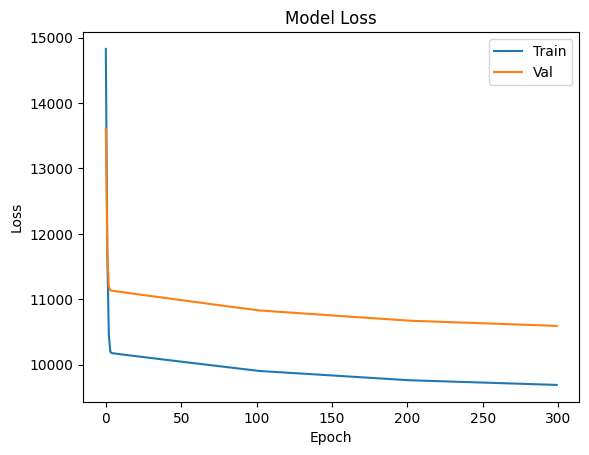

In [ ]:
def plot_loss(history, title="Model Loss"):
  """Imprime una gráfica mostrando la pérdida por epoch obtenida en un entrenamiento"""
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title(title)
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper right')
  plt.show()

plot_loss(history, title="Model Loss")

## Evaluacion

In [ ]:
model.evaluate(Xtest, ytest, verbose=1)

7/7 [==============================] - 0s 2ms/step - loss: 8481.4727


8481.47265625

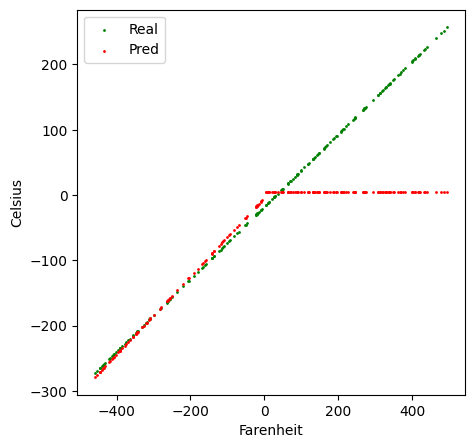

In [ ]:
ypred = model.predict(Xtest, verbose=0)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))

ax.scatter(Xtest, ytest, color='green', label='Real', s=1)
ax.scatter(Xtest, ypred, color='red', label='Pred', s=1)
ax.set_ylabel('Celsius')
ax.set_xlabel('Farenheit')
ax.legend();

# Exportación del modelo

In [ ]:
#Exportar el modelo en formato h5 (LEGACY)
model.save('fahrenheit_to_celsius.h5')

In [ ]:
#Exportar el modelo en formato nativo keras
model.save('fahrenheit_to_celsius.keras')

In [ ]:
#El equipo es Linux. Listemos el contenido de la carpeta actual para ver que se exporto el modelo
!ls

fahrenheit_to_celsius.h5  fahrenheit_to_celsius.keras  sample_data


In [ ]:
#Para convertirlo a tensorflow.js, primero debemos instalar la libreria
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 726.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 27.2 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0
  Attempting uninstall: ml-dtypes
   

In [ ]:
#Crear carpeta donde se colocaran los archivos resultantes
!mkdir carpeta_salida

In [ ]:
#Realizar la exportacion a la carpeta de salida
!tensorflowjs_converter --input_format keras fahrenheit_to_celsius.h5 carpeta_salida

2024-04-20 17:59:23.407401: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-20 17:59:27.397176: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Interfaz

Una vez exportado el modelo agregamos a la parte de front-end los ficheros '.json' y '.bin' creados, Se ejecutará una pequeña interfaz web que importará el modelo.

Para visualizarlo crearemos un pequeño servidor http usando python en el directorio donde se encuentra dicho proyecto web, con el comando:

python -m http.server 8000

Una vez hecho, basta con usar el navegador hacia el puerto definido de nuestra máquina local. En este ejemplo, "localhost:8000".

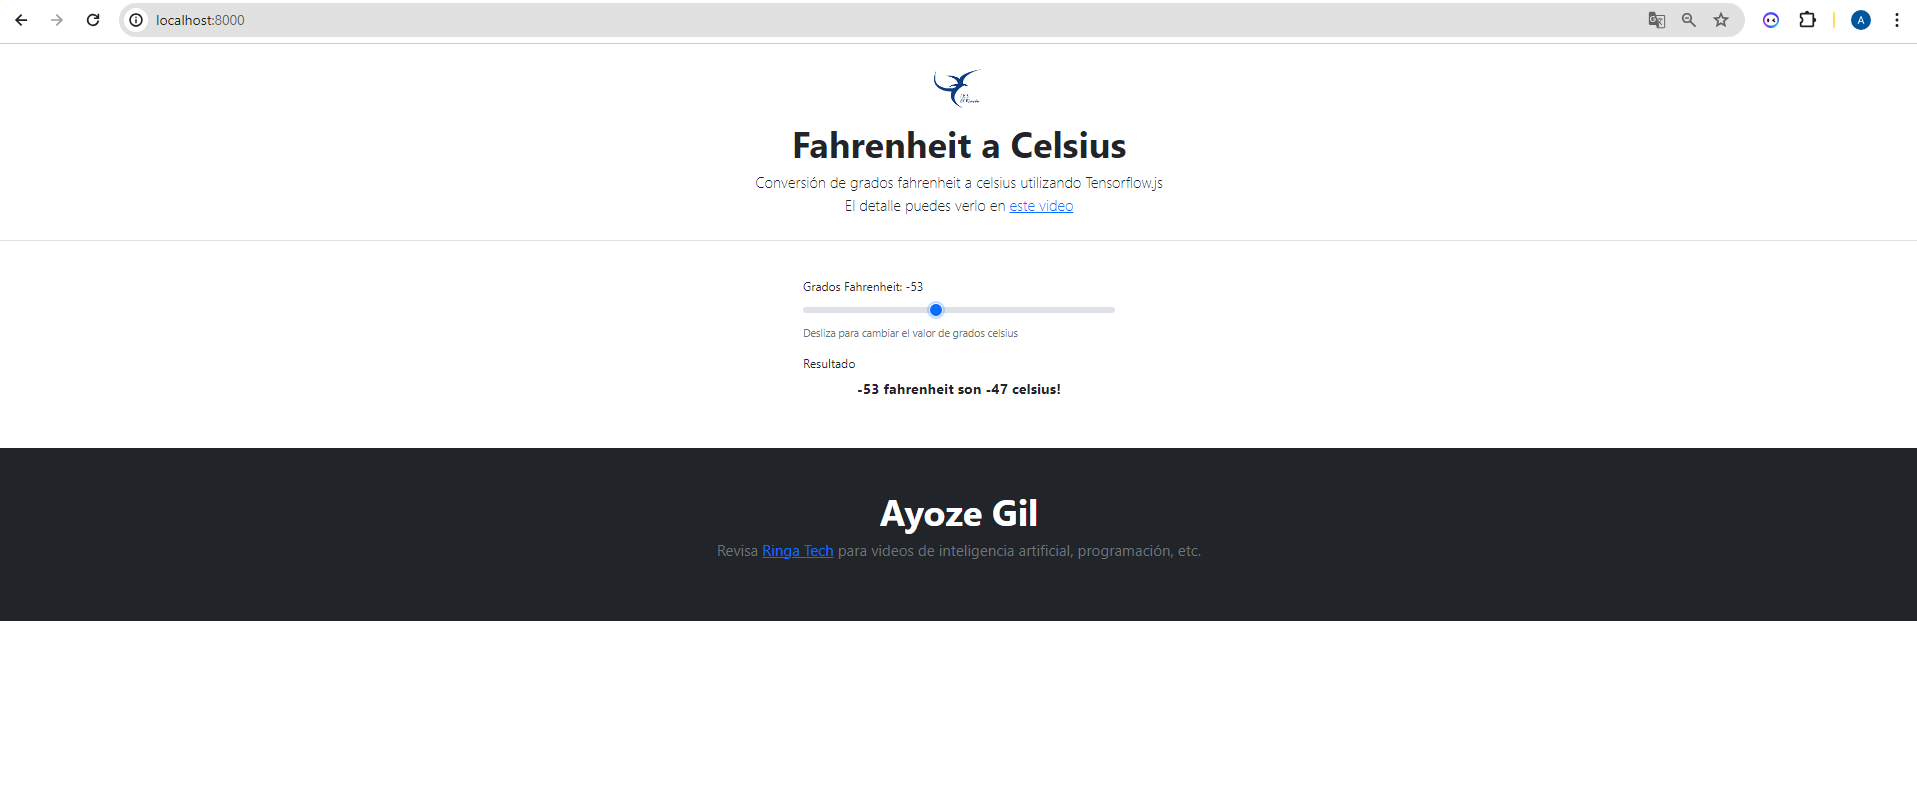